In [1]:
import json
import glob
import pandas as pd
from matplotlib import pyplot as plt
#!pip install pyqt5
%matplotlib inline

In [31]:
# Import data
files = glob.glob("logs/*.json")

results = []
for file in files:
    with open(file) as f:
        data = json.load(f)
#         data['name'] = file
        data['conv_ratio'] = data['param_set']['DAC_freq']/data['param_set']['ADC_freq']
        data['DAC_freq'] = data['param_set']['DAC_freq']
        for k in data['param_set']:
            data[k] = data['param_set'][k]
#         del data['param_set']
        del data['found_devices']

#         for k in data['cfg']:
#             data[k] = data['cfg'][k]
#         for k in data['cfg']['clock']:
#             data[k] = data['cfg']['clock'][k]
        od = data['cfg']['clock']['out_dividers']
        od.sort()
        for i, k in enumerate(od):
#             for g in data['cfg']['clock'][k]):
            data[f"out_dividers_{i}"] = k
            
#         del data['cfg']
        if 'jdevices_statuses' in data:
            del data['jdevices_statuses']
    results.append(data)

df = pd.DataFrame(results, columns=results[0].keys())
df

,param_set,status,cfg,conv_ratio,DAC_freq,ADC_freq,fddc,cddc,fduc,cduc,out_dividers_0,out_dividers_1,out_dividers_2,out_dividers_3,out_dividers_4
0,"{'DAC_freq': 3000000000, 'ADC_freq': 150000000...",failed,"{'clock': {'r2': 128, 'n2': 3125, 'out_divider...",2.0,3000000000,1500000000,2,3,4,6,1,12,24,384,768
1,"{'DAC_freq': 6000000000, 'ADC_freq': 600000000...",failed,"{'clock': {'r2': 128, 'n2': 3125, 'out_divider...",1.0,6000000000,6000000000,4,4,4,4,5,8,8,256,256
2,"{'DAC_freq': 4000000000, 'ADC_freq': 400000000...",passed,"{'clock': {'r2': 128, 'n2': 3125, 'out_divider...",1.0,4000000000,4000000000,4,4,4,4,12,12,24,384,3456
3,"{'DAC_freq': 12000000000, 'ADC_freq': 40000000...",passed,"{'clock': {'r2': 128, 'n2': 3125, 'out_divider...",3.0,12000000000,4000000000,4,4,6,8,5,12,12,384,384
4,"{'DAC_freq': 9000000000, 'ADC_freq': 900000000...",failed,"{'clock': {'r2': 128, 'n2': 3125, 'out_divider...",1.0,9000000000,9000000000,4,6,4,6,5,8,8,256,256
5,"{'DAC_freq': 4500000000, 'ADC_freq': 450000000...",failed,"{'clock': {'r2': 128, 'n2': 3125, 'out_divider...",1.0,4500000000,4500000000,2,6,4,6,5,8,16,256,512
6,"{'DAC_freq': 6000000000, 'ADC_freq': 300000000...",failed,"{'clock': {'r2': 128, 'n2': 3125, 'out_divider...",2.0,6000000000,3000000000,8,3,4,6,5,12,24,384,768
7,"{'DAC_freq': 6000000000, 'ADC_freq': 200000000...",failed,"{'clock': {'r2': 128, 'n2': 3125, 'out_divider...",3.0,6000000000,2000000000,4,2,4,4,5,8,12,256,384
8,"{'DAC_freq': 6000000000, 'ADC_freq': 600000000...",failed,"{'clock': {'r2': 128, 'n2': 3125, 'out_divider...",1.0,6000000000,6000000000,8,6,4,6,5,12,24,384,768
9,"{'DAC_freq': 12000000000, 'ADC_freq': 12000000...",passed,"{'clock': {'r2': 128, 'n2': 3125, 'out_divider...",1.0,12000000000,12000000000,16,4,8,4,5,8,16,256,512


<AxesSubplot:xlabel='out_dividers_3'>

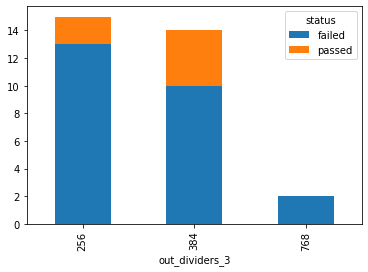

In [38]:
target = "out_dividers_3"
df2 = df.groupby([target,'status'])['status'].count().unstack().fillna(0)
df2
df2.plot(kind='bar', stacked=True)

In [11]:
# data['param_set']
# df

In [5]:
df.columns

Index(['param_set', 'status', 'cfg', 'conv_ratio', 'DAC_freq', 'ADC_freq',
       'fddc', 'cddc', 'fduc', 'cduc', 'bit_clock', 'multiframe_clock',
       'sample_clock', 'F', 'HD', 'K', 'L', 'M', 'Np', 'S', 'CS', 'jesd_class',
       'converter_clock', 'jesd_mode', 'jesd_class_int'],
      dtype='object')

In [24]:
# df
df2 = df.groupby(['out_dividers','status'])['status']
df2.head()

TypeError: unhashable type: 'list'